In [66]:
df = pd.read_csv('covid_toy.csv')

df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [79]:
X=df.iloc[:, [0, 2]]
y=df['has_covid']
X

,age,fever
0,60,103.0
1,27,100.0
2,42,101.0
3,31,98.0
4,65,101.0
...,...,...
95,12,104.0
96,51,101.0
97,20,101.0
98,5,98.0


In [70]:
import pandas as pd
import numpy as np

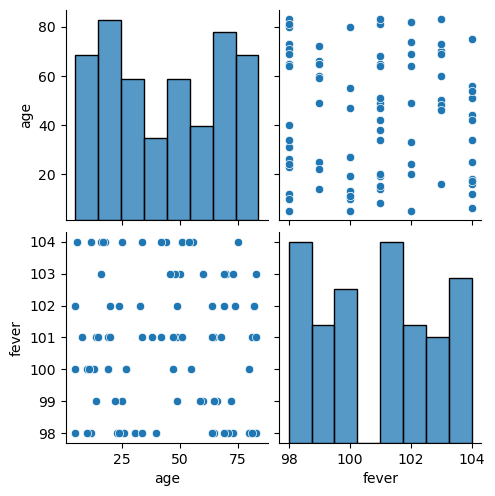

In [72]:
import seaborn as sns
sns.pairplot(X)

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

# Drop rows with any missing values
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches cleaned X

# Then run your cross_val_score loop again


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [85]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.54
rf 0.43
knn 0.5


In [89]:
from sklearn.ensemble import VotingClassifier

In [91]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.5


In [93]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.47


In [95]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))


for i=1,j=1,k=1 0.46
for i=1,j=1,k=2 0.46
for i=1,j=1,k=3 0.5
for i=1,j=2,k=1 0.48
for i=1,j=2,k=2 0.46
for i=1,j=2,k=3 0.47
for i=1,j=3,k=1 0.46
for i=1,j=3,k=2 0.43
for i=1,j=3,k=3 0.43
for i=2,j=1,k=1 0.49
for i=2,j=1,k=2 0.49
for i=2,j=1,k=3 0.51
for i=2,j=2,k=1 0.52
for i=2,j=2,k=2 0.48
for i=2,j=2,k=3 0.46
for i=2,j=3,k=1 0.47
for i=2,j=3,k=2 0.5
for i=2,j=3,k=3 0.44
for i=3,j=1,k=1 0.5
for i=3,j=1,k=2 0.48
for i=3,j=1,k=3 0.49
for i=3,j=2,k=1 0.51
for i=3,j=2,k=2 0.47
for i=3,j=2,k=3 0.46
for i=3,j=3,k=1 0.48
for i=3,j=3,k=2 0.48
for i=3,j=3,k=3 0.48


In [107]:

from sklearn.svm import SVC
#from sklearn.datasets import make_classification

#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [108]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
